# Alzheimer's Disease - Model Selections

In [2]:
import pycaret
from platform import python_version
print(f'Pycaret version: {pycaret.__version__}\nPython version: {python_version()}')

Pycaret version: 3.0.0
Python version: 3.9.16


In [8]:
import pandas as pd
df = pd.read_csv('./Data/ad_350.csv')
print(df.shape)
df.head()

(350, 9)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,Nondemented,1,87,14,2.0,27.0,0.0,1986.550000,0.696106
1,Nondemented,1,88,14,2.0,30.0,0.0,2004.479526,0.681062
2,Demented,1,75,12,3.0,23.0,0.5,1678.290000,0.736336
3,Demented,1,76,12,3.0,28.0,0.5,1737.620000,0.713402
4,Demented,1,80,12,3.0,22.0,0.5,1697.911134,0.701236


In [9]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [10]:
data = df.sample(frac=0.90)
data_unseen = df.drop(data.index)
print(f'Data for model: {data.shape},\nData for unseen predictions: {data_unseen.shape}')

Data for model: (315, 9),
Data for unseen predictions: (35, 9)


# Pycaret - Create Models

Models will be selected based on:
- Performance: Accuracy, Precision and F1
- Time-efficient

In [16]:
from pycaret.classification import  *
s = setup(data=data, target='Group')

,Description,Value
0,Session id,5471
1,Target,Group
2,Target type,Binary
3,Target mapping,"Demented: 0, Nondemented: 1"
4,Original data shape,"(315, 9)"
5,Transformed data shape,"(315, 9)"
6,Transformed train set shape,"(220, 9)"
7,Transformed test set shape,"(95, 9)"
8,Numeric features,8
9,Preprocess,True


In [18]:
s.dataset_transformed

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,Group
142,1.0,84.0,17.0,1.0,29.0,0.0,1707.160034,0.716679,1
225,0.0,76.0,12.0,3.0,27.0,0.5,1316.369995,0.726850,0
194,1.0,77.0,16.0,2.0,30.0,0.0,1628.420044,0.709147,1
306,1.0,82.0,14.0,2.0,23.0,0.5,1514.180054,0.677664,0
169,0.0,84.0,12.0,4.0,26.0,0.5,1273.439941,0.686334,0
...,...,...,...,...,...,...,...,...,...
265,0.0,68.0,16.0,1.0,29.0,0.5,1344.328003,0.733195,0
238,0.0,78.0,14.0,3.0,15.0,2.0,1401.130005,0.700165,0
52,0.0,62.0,18.0,1.0,30.0,0.0,1392.081543,0.817044,1
267,0.0,78.0,16.0,3.0,27.0,0.5,1393.150024,0.689740,0


In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
#compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9878,0.9987,0.9795,1.0000,0.9892,0.9754,0.9769,6.2450
et,Extra Trees Classifier,0.9878,1.0000,0.9795,1.0000,0.9892,0.9754,0.9769,4.3760
xgboost,Extreme Gradient Boosting,0.9878,0.9993,0.9795,1.0000,0.9892,0.9754,0.9769,3.8770
catboost,CatBoost Classifier,0.9878,0.9960,0.9795,1.0000,0.9892,0.9754,0.9769,5.0370
nb,Naive Bayes,0.9837,0.9993,0.9724,1.0000,0.9854,0.9670,0.9687,4.2800
lda,Linear Discriminant Analysis,0.9837,0.9959,0.9795,0.9933,0.9857,0.9667,0.9685,4.9680
lightgbm,Light Gradient Boosting Machine,0.9798,0.9920,0.9795,0.9875,0.9825,0.9589,0.9615,3.9580
qda,Quadratic Discriminant Analysis,0.9797,0.9980,0.9652,1.0000,0.9817,0.9589,0.9610,5.9290
gbc,Gradient Boosting Classifier,0.9795,0.9946,0.9795,0.9867,0.9823,0.9580,0.9602,4.1320
lr,Logistic Regression,0.9758,0.9987,0.9795,0.9808,0.9790,0.9507,0.9536,5.3660


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=210, verbose=0, warm_start=False)

In [6]:
compare_models(include=['rf','et','xgboost','catboost', 'ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9958,0.9986,0.9929,1.0000,0.9963,0.9915,0.9919,8.5430
et,Extra Trees Classifier,0.9958,0.9986,0.9929,1.0000,0.9963,0.9915,0.9919,6.2550
xgboost,Extreme Gradient Boosting,0.9958,0.9964,0.9929,1.0000,0.9963,0.9915,0.9919,6.0190
catboost,CatBoost Classifier,0.9958,0.9929,0.9929,1.0000,0.9963,0.9915,0.9919,6.3920
ridge,Ridge Classifier,0.9918,0.0000,0.9929,0.9933,0.9928,0.9834,0.9840,6.6140


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=818, verbose=0, warm_start=False)

In [43]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.0000,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9545,0.0000,0.9231,1.0000,0.9600,0.9076,0.9115
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9545,0.0000,1.0000,0.9286,0.9630,0.9043,0.9085
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
t_ridge = tune_model(ridge)
f_ridge = finalize_model(t_ridge)
f_ridge

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.0000,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.0000,0.9231,0.9231,0.9231,0.8120,0.8120
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              c...
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 positive=False, random_state=5471,
                                 solver='auto', tol=0.0001))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

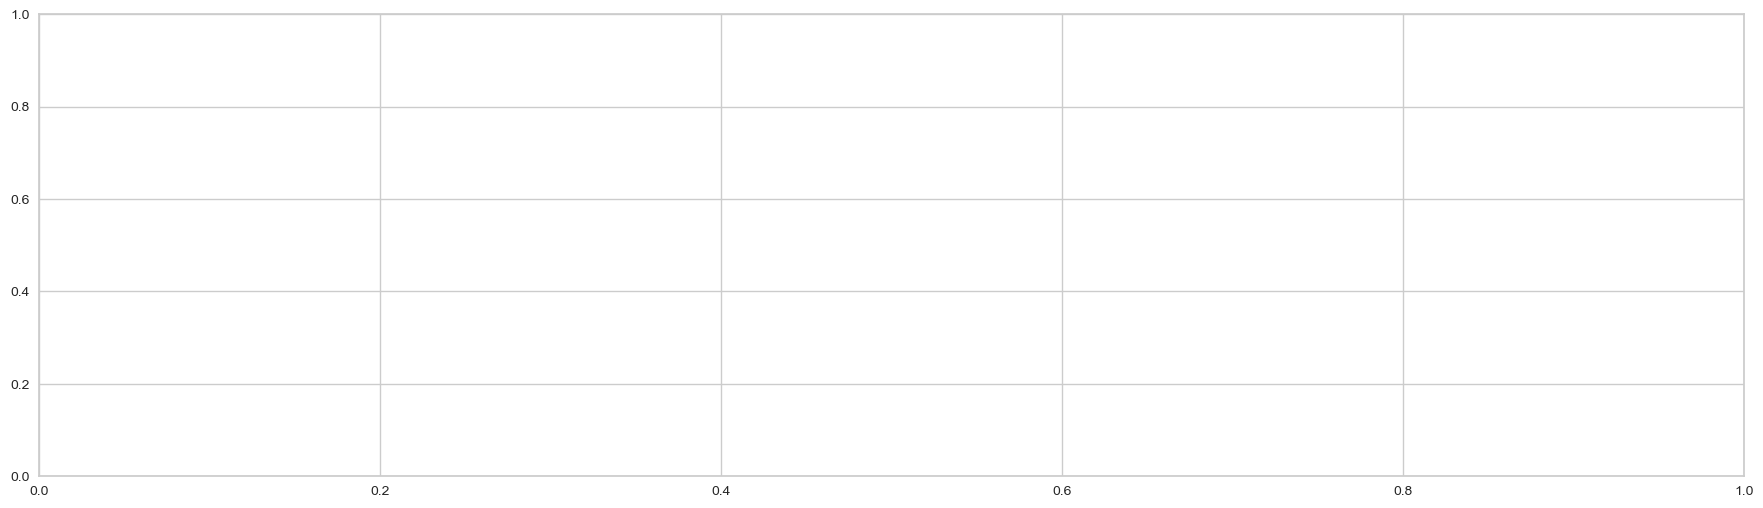

In [53]:
evaluate_model(f_ridge)

In [69]:
save_model(f_ridge,'./Models/ridge_ad')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['M/F', 'Age', 'EDUC', 'SES',
                                              'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=Clea

In [47]:
lgbm = create_model('lightgbm')
t_lgbm = tune_model(lgbm)
f_lgbm = finalize_model(t_lgbm)
f_lgbm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,1.0000,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.9829,0.9231,0.9231,0.9231,0.8120,0.8120
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9545,1.0000,1.0000,0.9286,0.9630,0.9043,0.9085
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9777,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9545,0.9658,0.9231,1.0000,0.9600,0.9076,0.9115
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              c...
                                colsample_bytree=1.0, feature_fraction=0.5,
                                importance_type='split', learning_rate=0.15,
                                max_depth=-1, min_child_samples=41,
                                min_child_weight=0.001, min_split_gain=0.2,
                                n_estimators=270, n_jobs=-1, num_leaves=20,
                                objective=None, random_state=5471, reg_alpha=2,
                                reg_lambda=0.001, silent='warn', subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

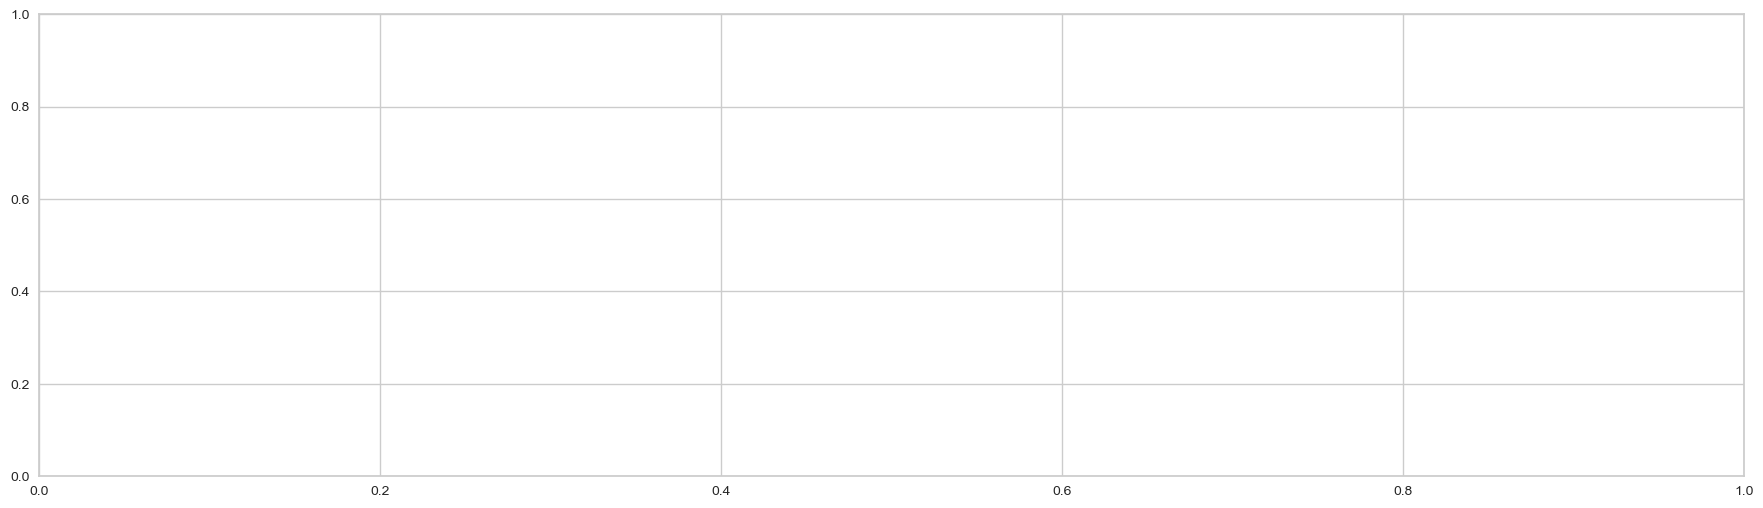

In [48]:
evaluate_model(f_lgbm)

In [70]:
save_model(f_lgbm,'./Models/lgbm_ad')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['M/F', 'Age', 'EDUC', 'SES',
                                              'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.15,
                                 max_depth=-1, min_child_samples=41,
                                 min_child_weight=0.001, min_split_gain=0.2,
                                 n

In [34]:
lda = create_model('lda')
t_lda = tune_model(lda)
f_lda = finalize_model(t_lda)
f_lda

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9643,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9545,0.9744,0.9231,1.0000,0.9600,0.9076,0.9115
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9545,1.0000,1.0000,0.9286,0.9630,0.9043,0.9085
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9732,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,0.9744,0.9231,0.9231,0.9231,0.8120,0.8120
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              c...
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

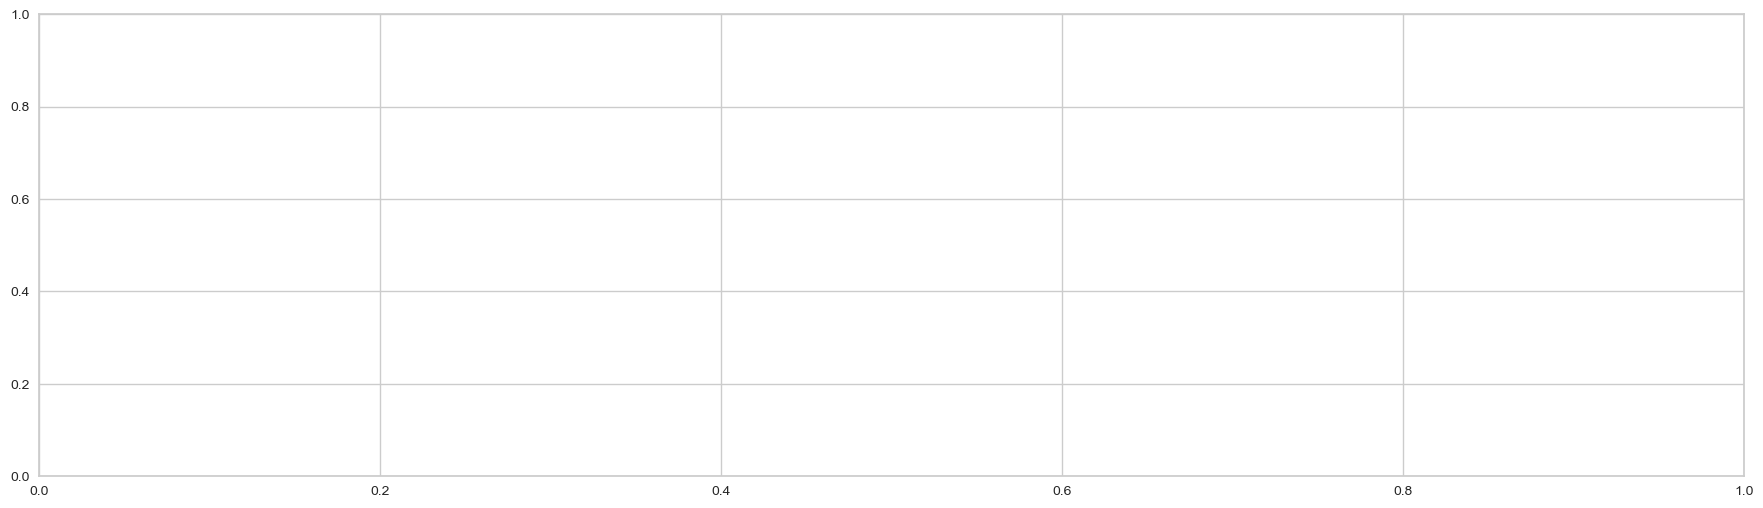

In [35]:
evaluate_model(f_lda)

In [71]:
save_model(f_lda,'./Models/lda_ad')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['M/F', 'Age', 'EDUC', 'SES',
                                              'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=Clea

In [19]:
xgb = create_model('xgboost')
t_xgb = tune_model(xgb)
f_xgb = finalize_model(t_xgb)
f_xgb

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,1.0000,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9545,0.9915,0.9231,1.0000,0.9600,0.9076,0.9115
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,1.0000,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9545,1.0000,0.9231,1.0000,0.9600,0.9076,0.9115
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              c...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='binary:logistic', predictor=None, ...))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

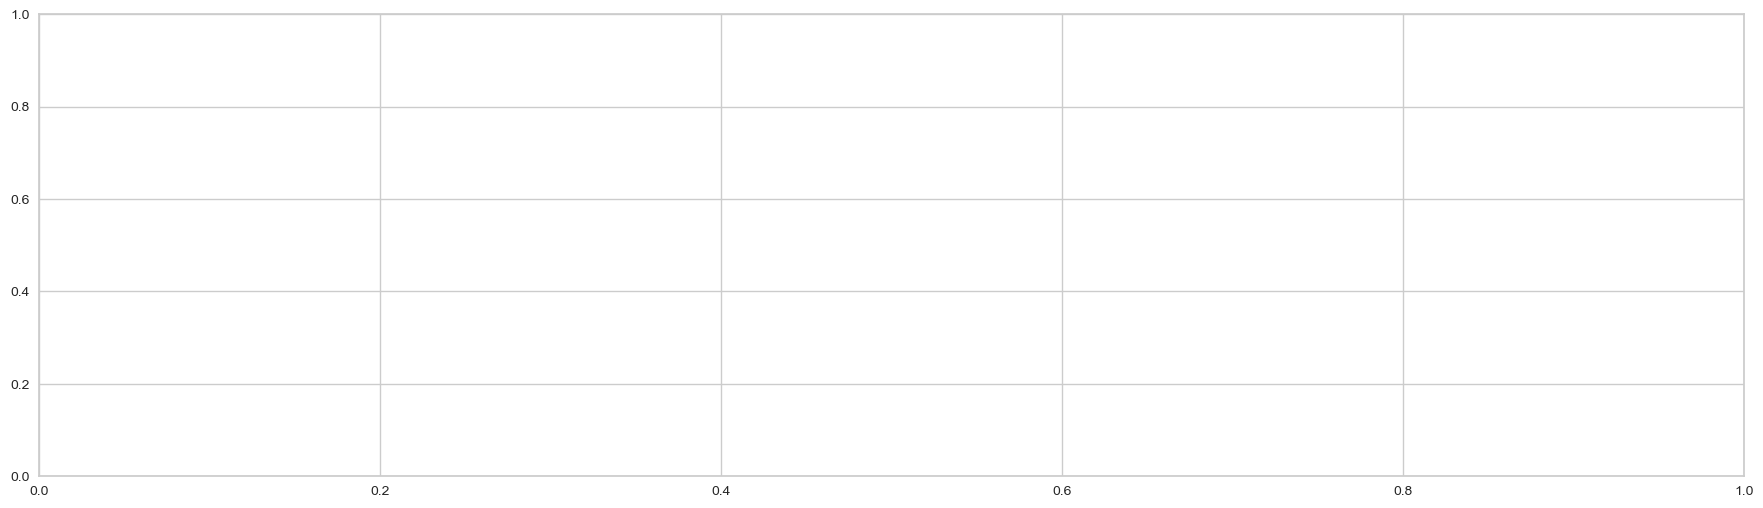

In [22]:
evaluate_model(f_xgb)

In [72]:
save_model(f_xgb,'./Models/xgb_ad')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['M/F', 'Age', 'EDUC', 'SES',
                                              'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                ma

In [27]:
et = create_model('et')
t_et = tune_model(et)
f_et = finalize_model(t_et)
f_et

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9911,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9545,0.9915,0.9231,1.0000,0.9600,0.9076,0.9115
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9554,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9545,0.9658,0.9231,1.0000,0.9600,0.9076,0.9115
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              c...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=5471,
                                      verbose=0, warm_start=False))],
         verbose=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

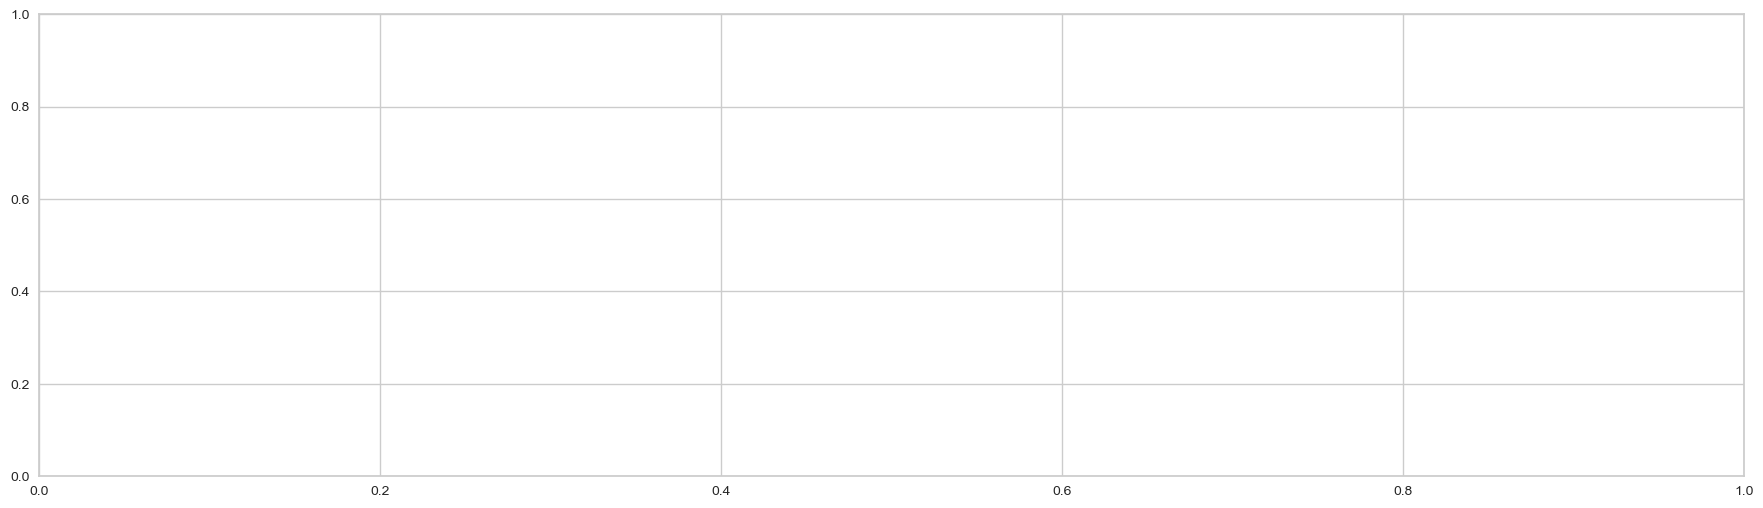

In [73]:
evaluate_model(f_et)

In [74]:
save_model(f_et,'./Models/et_ad')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['M/F', 'Age', 'EDUC', 'SES',
                                              'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                  

In [75]:
#plot_model(f_et, plot='confusion_matrix')

In [30]:
rf = create_model('rf')
t_rf = tune_model(rf)
f_rf = finalize_model(t_rf)
f_rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9821,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9545,0.9701,0.9231,1.0000,0.9600,0.9076,0.9115
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9643,0.9286,1.0000,0.9630,0.9043,0.9085
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9545,0.9615,0.9231,1.0000,0.9600,0.9076,0.9115
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['M/F', 'Age', 'EDUC', 'SES',
                                             'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              c...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=5471,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [76]:
#plot_model(f_rf, plot='confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

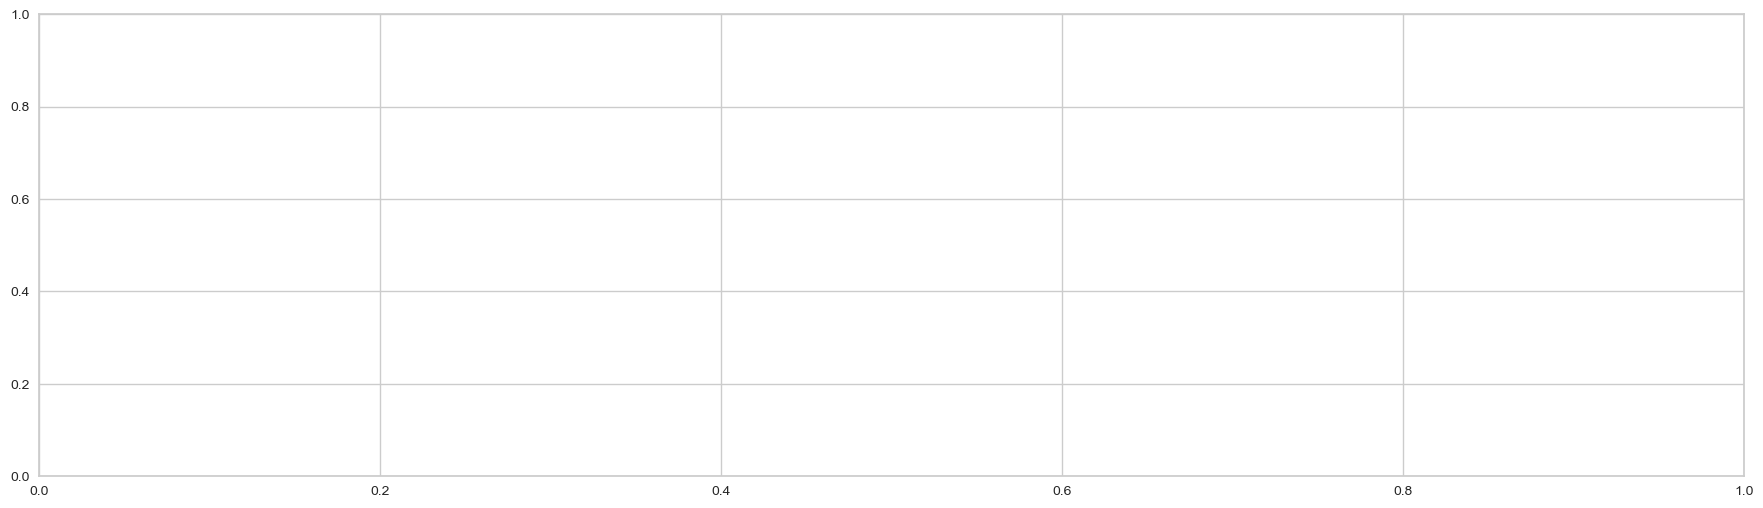

In [80]:
evaluate_model(t_rf)

In [77]:
save_model(f_rf,'./Models/rf_ad')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\lethu\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['M/F', 'Age', 'EDUC', 'SES',
                                              'MMSE', 'CDR', 'eTIV', 'nWBV'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                           

# Yellowbricks - Compare models

In [83]:
X = data.drop(columns=['Group'], axis=1)
y = data['Group']

In [84]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.30, shuffle=True)

In [85]:
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.svm import LinearSVC, NuSVC, SVC
#from sklearn.neighbors import KNeighborsClassifier


models = [
    XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None),
    
    ExtraTreesClassifier(n_jobs=-1),
    
    RandomForestClassifier(n_jobs=-1),
    
    LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, feature_fraction=0.5,
               learning_rate=0.15, min_child_samples=41, min_split_gain=0.2,
               n_estimators=270, num_leaves=20, reg_alpha=2,
               reg_lambda=0.001),
    LinearDiscriminantAnalysis(),
    RidgeClassifier()
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        #('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)
    
    f1 = f1_score(expected, predicted)
    acc = accuracy_score(expected, predicted) #  average='weighted'
    prec = precision_score(expected, predicted,average='weighted',zero_division=True)

    # Compute and return F1 (harmonic mean of precision and recall)
    print(f'{estimator.__class__.__name__}:')
    print(f'F1_score: {f1*100:.2f}%')
    print(f'ACC : {acc*100:.2f}%')
    print(f'Prec: {prec*100:,.2f}%')

for model in models:
    results=score_model(X, y, model)

XGBClassifier:
F1_score: 100.00%
ACC : 100.00%
Prec: 100.00%
ExtraTreesClassifier:
F1_score: 100.00%
ACC : 100.00%
Prec: 100.00%
RandomForestClassifier:
F1_score: 100.00%
ACC : 100.00%
Prec: 100.00%
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
LGBMClassifier:
F1_score: 99.19%
ACC : 99.05%
Prec: 99.07%
LinearDiscriminantAnalysis:
F1_score: 99.19%
ACC : 99.05%
Prec: 99.07%
RidgeClassifier:
F1_score: 99.19%
ACC : 99.05%
Prec: 99.07%


## Test again unseen data

In [57]:
print(data_unseen.shape)
data_unseen.head()

(35, 9)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
2,Demented,1,75,12,3.0,23.0,0.5,1678.29,0.736336
5,Nondemented,0,88,18,3.0,28.0,0.0,1215.33,0.709512
6,Nondemented,0,90,18,3.0,27.0,0.0,1200.10,0.718214
16,Demented,1,69,12,2.0,24.0,0.5,1479.84,0.790712
19,Nondemented,0,78,16,2.0,29.0,0.0,1333.37,0.747875


In [78]:
loaded_et = load_model('./Models/et_ad')
loaded_rf = load_model('./Models/rf_ad')
loaded_xgb = load_model('./Models/xgb_ad')
loaded_lda = load_model('./Models/xgb_ad')
loaded_ridge = load_model('./Models/xgb_ad')
loaded_lgbm = load_model('./Models/xgb_ad')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [79]:
unseen_ridge = predict_model(loaded_ridge, data=data_unseen)
unseen_lda = predict_model(loaded_lda, data=data_unseen)
unseen_et = predict_model(loaded_et, data=data_unseen)
unseen_rf = predict_model(loaded_rf, data=data_unseen)
unseen_xgb = predict_model(loaded_xgb, data=data_unseen)
unseen_lgbm = predict_model(loaded_lgbm, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,0,0,0,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,0,0,0,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,0,0,0,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,0,0,0,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,0,0,0,1.0000,1.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,0,0,0,1.0000,1.0000
